In [2]:
import warnings
warnings.filterwarnings("ignore")
from random import seed
from random import randrange
from csv import reader
from math import sqrt
from sklearn import preprocessing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from prettytable import PrettyTable
from sklearn.linear_model import SGDRegressor
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [3]:
#Reading CSV File
csvFile = pd.read_csv("pubg_data.csv")

In [4]:
#To Print Column Names
print(csvFile.keys())

Index(['Unnamed: 0', 'Id', 'groupId', 'matchId', 'assists', 'boosts',
       'damageDealt', 'DBNOs', 'headshotKills', 'heals', 'killPlace',
       'killPoints', 'kills', 'killStreaks', 'longestKill', 'matchDuration',
       'matchType', 'maxPlace', 'numGroups', 'rankPoints', 'revives',
       'rideDistance', 'roadKills', 'swimDistance', 'teamKills',
       'vehicleDestroys', 'walkDistance', 'weaponsAcquired', 'winPoints',
       'winPlacePerc'],
      dtype='object')


In [5]:
#Dropping Unncessary Columns
csvFile.drop(['Unnamed: 0','Id','groupId', 'matchId','matchType'],axis = 1, inplace = True)

In [6]:
#Creating subset of data
subsetData = csvFile[::1000]
# Summarizing shape
print(subsetData.shape)

(1112, 25)


In [7]:
# Summarizing First 5 Lines of Data
subsetData.head()

,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,0,0,25.93,0,0,0,84,1437,0,0,...,0,0.0,0,0.00,0,0,151.3,1,1525,0.0667
1000,0,2,400.00,0,3,2,5,0,4,1,...,0,2468.0,0,29.92,0,0,3268.0,6,0,0.8617
2000,0,1,42.57,0,0,4,58,0,0,0,...,0,579.7,0,0.00,0,0,1121.0,7,0,0.4074
3000,0,4,25.80,0,0,9,36,0,0,0,...,0,854.7,0,57.71,0,0,2568.0,8,0,0.8846
4000,0,0,19.69,0,0,0,47,993,0,0,...,0,2811.0,0,0.00,1,0,1239.0,5,1437,0.7407


In [8]:
#Defining Target
target_column = ['winPlacePerc']
#Setting Predictors
predictors = list(set(list(subsetData.columns))-set(target_column))
subsetData[predictors] = subsetData[predictors]/subsetData[predictors].max()
subsetData.describe()
print(subsetData)

         assists    boosts  damageDealt     DBNOs  headshotKills     heals  \
0           0.00  0.000000     0.016729  0.000000            0.0  0.000000   
1000        0.00  0.181818     0.258065  0.000000            0.6  0.095238   
2000        0.00  0.090909     0.027465  0.000000            0.0  0.190476   
3000        0.00  0.363636     0.016645  0.000000            0.0  0.428571   
4000        0.00  0.000000     0.012703  0.000000            0.0  0.000000   
...          ...       ...          ...       ...            ...       ...   
1107000     0.00  0.000000     0.063065  0.000000            0.0  0.000000   
1108000     0.00  0.000000     0.179935  0.181818            0.0  0.000000   
1109000     0.25  0.181818     0.217032  0.272727            0.0  0.047619   
1110000     0.00  0.000000     0.000000  0.000000            0.0  0.047619   
1111000     0.00  0.272727     0.064516  0.000000            0.0  0.333333   

         killPlace  killPoints     kills  killStreaks  ...   re

In [9]:
#Defining X and y Values
X = subsetData[predictors].values
y = subsetData[target_column].values

In [11]:
#Splitting the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [12]:
#Standardizing the Data
sgdScaler = preprocessing.StandardScaler()
X_train = sgdScaler.fit_transform(X_train)
X_test = sgdScaler.transform(X_test)

In [24]:
#Creating Dataframe
features = subsetData.columns
X_train = pd.DataFrame(data = X_train, columns=predictors)
X_train['winPlacePerc'] = list(y_train)  
X_test = pd.DataFrame(data = X_test, columns=predictors)
X_test['winPlacePerc'] = list(y_test)

In [25]:
X_train.head()

,walkDistance,killStreaks,damageDealt,rideDistance,winPoints,swimDistance,matchDuration,weaponsAcquired,assists,heals,...,revives,DBNOs,killPoints,vehicleDestroys,teamKills,roadKills,boosts,headshotKills,kills,winPlacePerc
0,0.293091,0.639143,1.232728,-0.401223,1.185453,-0.179546,-0.778997,0.696188,-0.401135,2.376427,...,-0.363398,1.136018,1.524491,-0.083948,-0.143491,-0.050767,-0.050419,-0.39457,0.673517,[0.68]
1,-0.756908,-0.749833,-0.619981,-0.401223,1.254477,-0.179546,-0.740308,-0.691432,-0.401135,-0.511772,...,-0.363398,-0.566915,1.233764,-0.083948,-0.143491,-0.050767,0.526431,-0.39457,-0.593705,[0.2917]
2,-0.762940,-0.749833,-0.147209,-0.401223,1.362752,-0.179546,-0.933756,-0.228892,-0.401135,-0.511772,...,-0.363398,-0.566915,1.491667,-0.083948,-0.143491,-0.050767,-0.627268,-0.39457,-0.593705,[0.2222]
3,-0.468233,0.639143,0.479665,-0.401223,1.200340,-0.179546,0.931080,-0.228892,-0.401135,-0.511772,...,-0.363398,-0.566915,1.916816,-0.083948,-0.143491,-0.050767,-0.050419,-0.39457,0.673517,[0.3684]
4,0.069046,0.639143,-0.176866,1.508861,-0.818976,-0.179546,1.542375,0.696188,-0.401135,-0.511772,...,-0.363398,-0.566915,-0.801326,-0.083948,-0.143491,-0.050767,-0.627268,-0.39457,0.039906,[0.3936]


In [27]:
X_test=np.array(X_test)
y_test=np.array(y_test)

In [18]:
#Defining SGD Regressor Function

def sgd_regressor(X, y, learning_rate=0.2, n_epochs=1000, k=40):
    
    w = np.random.randn(1,13)  # Randomly initializing weights
    b = np.random.randn(1,1)   # Random intercept value
    
    epoch=1
    
    while epoch <= n_epochs:
        
        temp = X.sample(k)

        X_tr = temp.iloc[:,0:13].values
        y_tr = temp.iloc[:,-1].values
        
        Lw = w
        Lb = b
        
        loss = 0
        y_pred = []
        sq_loss = []
        
        for i in range(k):
              
            Lw = (-2/k * X_tr[i]) * (y_tr[i] - np.dot(X_tr[i],w.T) - b)
            Lb = (-2/k) * (y_tr[i] - np.dot(X_tr[i],w.T) - b)
            
            w = w - learning_rate * Lw
            b = b - learning_rate * Lb
            
            y_predicted = np.dot(X_tr[i],w.T)
            y_pred.append(y_predicted)
        
        loss = mean_squared_error(y_pred, y_tr)
            
        print("Epoch: %d, Loss: %.3f" %(epoch, loss))
        epoch+=1
        learning_rate = learning_rate/1.02
        
    return w,b

In [19]:
#Defining Predict Function
def predict(x,w,b):
    y_pred=[]
    for i in range(len(x)):
        temp_ = x
        X_test = temp_.iloc[:,0:13].values
        y = np.asscalar(np.dot(w,X_test[i])+b)
        y_pred.append(y)
    return np.array(y_pred)
w,b = sgd_regressor(X_train,y_train)
y_pred_customsgd = predict(X_test,w,b)

Epoch: 1, Loss: 5.766
Epoch: 2, Loss: 1.916
Epoch: 3, Loss: 1.242
Epoch: 4, Loss: 0.764
Epoch: 5, Loss: 0.737
Epoch: 6, Loss: 0.735
Epoch: 7, Loss: 0.700
Epoch: 8, Loss: 0.714
Epoch: 9, Loss: 0.396
Epoch: 10, Loss: 0.429
Epoch: 11, Loss: 0.422
Epoch: 12, Loss: 0.302
Epoch: 13, Loss: 0.359
Epoch: 14, Loss: 0.372
Epoch: 15, Loss: 0.377
Epoch: 16, Loss: 0.352
Epoch: 17, Loss: 0.443
Epoch: 18, Loss: 0.282
Epoch: 19, Loss: 0.290
Epoch: 20, Loss: 0.272
Epoch: 21, Loss: 0.317
Epoch: 22, Loss: 0.251
Epoch: 23, Loss: 0.250
Epoch: 24, Loss: 0.295
Epoch: 25, Loss: 0.249
Epoch: 26, Loss: 0.238
Epoch: 27, Loss: 0.216
Epoch: 28, Loss: 0.228
Epoch: 29, Loss: 0.269
Epoch: 30, Loss: 0.236
Epoch: 31, Loss: 0.268
Epoch: 32, Loss: 0.253
Epoch: 33, Loss: 0.308
Epoch: 34, Loss: 0.328
Epoch: 35, Loss: 0.240
Epoch: 36, Loss: 0.250
Epoch: 37, Loss: 0.230
Epoch: 38, Loss: 0.232
Epoch: 39, Loss: 0.257
Epoch: 40, Loss: 0.213
Epoch: 41, Loss: 0.218
Epoch: 42, Loss: 0.254
Epoch: 43, Loss: 0.203
Epoch: 44, Loss: 0.1

Epoch: 380, Loss: 0.243
Epoch: 381, Loss: 0.289
Epoch: 382, Loss: 0.236
Epoch: 383, Loss: 0.213
Epoch: 384, Loss: 0.236
Epoch: 385, Loss: 0.271
Epoch: 386, Loss: 0.235
Epoch: 387, Loss: 0.221
Epoch: 388, Loss: 0.209
Epoch: 389, Loss: 0.280
Epoch: 390, Loss: 0.237
Epoch: 391, Loss: 0.233
Epoch: 392, Loss: 0.249
Epoch: 393, Loss: 0.231
Epoch: 394, Loss: 0.215
Epoch: 395, Loss: 0.332
Epoch: 396, Loss: 0.238
Epoch: 397, Loss: 0.262
Epoch: 398, Loss: 0.234
Epoch: 399, Loss: 0.229
Epoch: 400, Loss: 0.266
Epoch: 401, Loss: 0.289
Epoch: 402, Loss: 0.229
Epoch: 403, Loss: 0.249
Epoch: 404, Loss: 0.225
Epoch: 405, Loss: 0.232
Epoch: 406, Loss: 0.259
Epoch: 407, Loss: 0.230
Epoch: 408, Loss: 0.281
Epoch: 409, Loss: 0.287
Epoch: 410, Loss: 0.288
Epoch: 411, Loss: 0.220
Epoch: 412, Loss: 0.202
Epoch: 413, Loss: 0.262
Epoch: 414, Loss: 0.217
Epoch: 415, Loss: 0.290
Epoch: 416, Loss: 0.275
Epoch: 417, Loss: 0.248
Epoch: 418, Loss: 0.251
Epoch: 419, Loss: 0.297
Epoch: 420, Loss: 0.266
Epoch: 421, Loss

Epoch: 749, Loss: 0.279
Epoch: 750, Loss: 0.260
Epoch: 751, Loss: 0.240
Epoch: 752, Loss: 0.273
Epoch: 753, Loss: 0.244
Epoch: 754, Loss: 0.210
Epoch: 755, Loss: 0.317
Epoch: 756, Loss: 0.274
Epoch: 757, Loss: 0.242
Epoch: 758, Loss: 0.223
Epoch: 759, Loss: 0.226
Epoch: 760, Loss: 0.233
Epoch: 761, Loss: 0.254
Epoch: 762, Loss: 0.280
Epoch: 763, Loss: 0.268
Epoch: 764, Loss: 0.234
Epoch: 765, Loss: 0.281
Epoch: 766, Loss: 0.241
Epoch: 767, Loss: 0.200
Epoch: 768, Loss: 0.260
Epoch: 769, Loss: 0.201
Epoch: 770, Loss: 0.236
Epoch: 771, Loss: 0.249
Epoch: 772, Loss: 0.263
Epoch: 773, Loss: 0.295
Epoch: 774, Loss: 0.234
Epoch: 775, Loss: 0.232
Epoch: 776, Loss: 0.254
Epoch: 777, Loss: 0.274
Epoch: 778, Loss: 0.271
Epoch: 779, Loss: 0.208
Epoch: 780, Loss: 0.234
Epoch: 781, Loss: 0.236
Epoch: 782, Loss: 0.302
Epoch: 783, Loss: 0.242
Epoch: 784, Loss: 0.245
Epoch: 785, Loss: 0.304
Epoch: 786, Loss: 0.240
Epoch: 787, Loss: 0.227
Epoch: 788, Loss: 0.227
Epoch: 789, Loss: 0.229
Epoch: 790, Loss

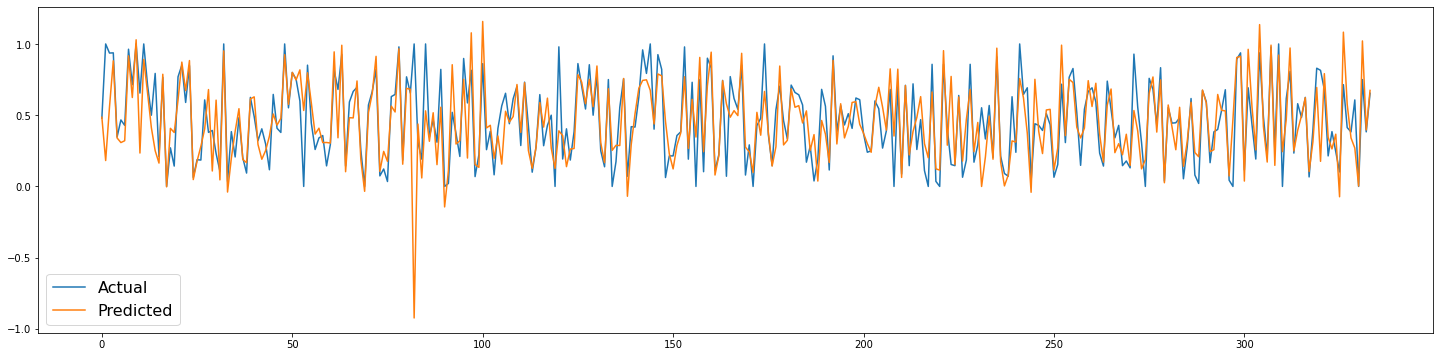

Mean Squared Error : 0.04282747148144916


In [32]:
#Comparing Predicted Values Vs Actual Values

from matplotlib.pyplot import figure
plt.figure(figsize=(25,6))
plt.plot(y_test, label='Actual')
plt.plot(y_pred_customsgd, label='Predicted')
plt.legend(prop={'size': 16})
plt.show()
print('Mean Squared Error :',mean_squared_error(y_test, y_pred_customsgd))

In [21]:
#Implementing SKlearn’s SGD Regressor

from sklearn.linear_model import SGDRegressor
clf = SGDRegressor(max_iter=1000, tol=1e-3)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

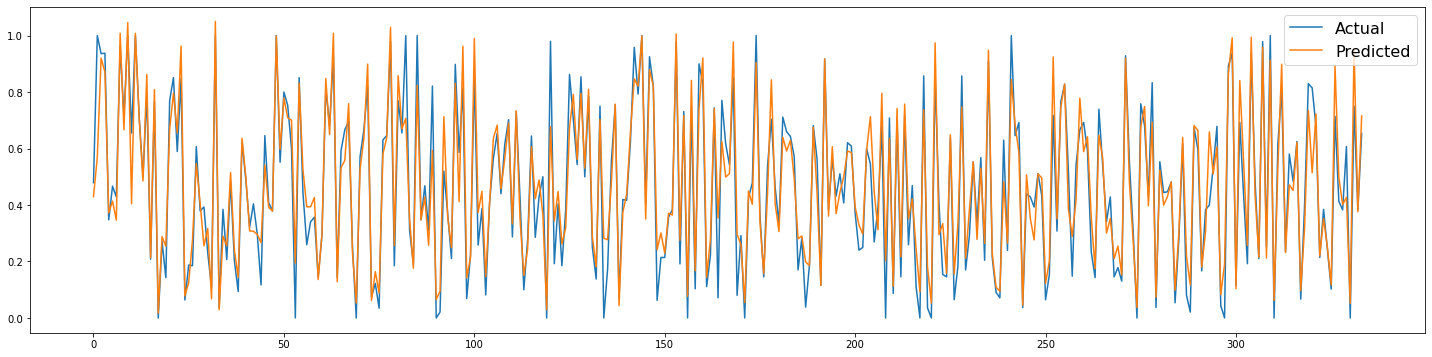

Mean Squared Error : 0.008412622710165315


In [22]:
#Comparing Predicted Values Vs Actual Values

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
plt.figure(figsize=(25,6))
plt.plot(y_test, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.legend(prop={'size': 16})
plt.show()
print('Mean Squared Error :',mean_squared_error(y_test, y_pred))

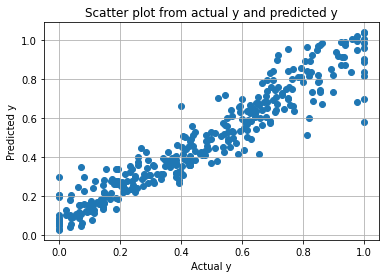

Mean Squared Error : 0.008445934647058836


In [30]:
# SkLearn SGD classifier
n_iter=100
clf_ = SGDRegressor(max_iter=n_iter)
clf_.fit(X_train, y_train)
y_pred_sksgd=clf_.predict(X_test)
plt.scatter(y_test,y_pred_sksgd)
plt.grid()
plt.xlabel('Actual y')
plt.ylabel('Predicted y')
plt.title('Scatter plot from actual y and predicted y')
plt.show()

print('Mean Squared Error :',mean_squared_error(y_test, y_pred_sksgd))